In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Cat/Dog Classification from the paper-back book

## General steps of developing a classifier
1. Download Dataset
2. Create a Dataloader
3. Download Pre-trained Model
4. Finetune model with dataset
5. Run Inference

Following two cells will only be needed to run once, on start of __every session__

In [1]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)/'images'

is_cat() function is labeling method that follows rules defined by dataset owners. For this particular dataset, filename starting with uppercase letter is for cat and lower case letter is for dogs 

In [ ]:
def is_cat(x): return x[0].isupper() 
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [ ]:
learn.fine_tune(1)

In [ ]:
# os.listdir(path) --> will show all the files in that path. adding [:10] will show first 10
os.listdir(path)[:10] 

In [ ]:
path, type(path)

In [ ]:
img = PILImage.create(str(path)+"/Persian_265.jpg")
img.to_thumb(192)

Doing inference by downloading image from internet and uploading to notebook via widgets

In [ ]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

In [ ]:
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [ ]:
is_cat,_, prob = learn.predict(img)
print(f"Is this a cat?: {is_cat} ")
print(f"Probability it's a cat: {prob[1].item():.6f}")

# CamVid segmentation dataset

In [2]:
path = untar_data(URLs.CAMVID_TINY)

Information on downloaded dataset folder/file structure

In [19]:
print(f"Dataset Path: {path}")
print(f"Dataset Folders: {os.listdir(path)}")
print(f"Dataset Folders first 3 images: {os.listdir(path/'images')[:3]}")
print(f"Dataset Folders first 3 labels: {os.listdir(path/'labels')[:3]}")

Dataset Path: /root/.fastai/data/camvid_tiny
Dataset Folders: ['images', 'codes.txt', 'labels']
Dataset Folders first 3 images: ['0001TP_006750.png', '0001TP_006840.png', '0016E5_06990.png']
Dataset Folders first 3 labels: ['Seq05VD_f04950_P.png', '0016E5_08280_P.png', 'Seq05VD_f03660_P.png']


In [21]:
dls = SegmentationDataLoaders.from_label_func(
    path, bx=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt',dtype=str)
)

In [22]:
learn = unet_learner(dls, resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [23]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.540215,3.265876,00:07


epoch,train_loss,valid_loss,time
0,3.310194,8.113467,00:01
1,4.160297,3.186477,00:01
2,3.795209,3.093556,00:01
3,3.475302,2.534343,00:01
4,3.251279,2.326375,00:01
5,3.069077,3.207162,00:01
6,3.003632,2.053067,00:01
7,2.846833,2.012549,00:01


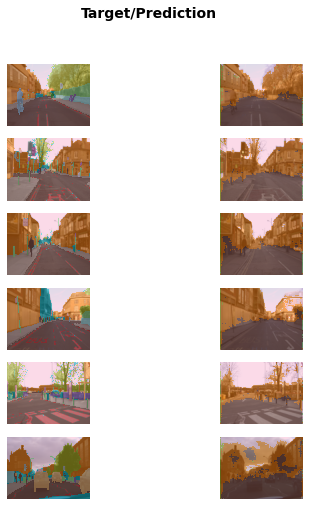

In [25]:
learn.show_results(max_n=6, figsize=(7,8))